## Unsupervised Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('seaborn-white')

### K-Means Clustering

Below we create some random data

In [5]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2)) # random distribution 50 data points
X[:25,0] = X[:25,0]+3 # shift by 3
X[:25,1] = X[:25,1]-4 # shift by -4

### K=2

In [6]:
km1 = KMeans(n_clusters=2, n_init=20) # run k means
km1.fit(X)
km1.labels_ # print the labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [7]:
# Sum of distances of samples to their closest cluster center.
km1.inertia_

99.30578397914685

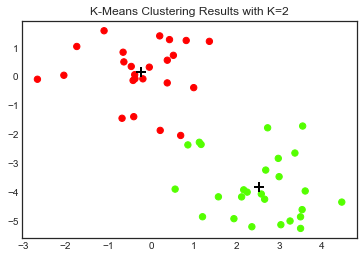

In [8]:
f, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax.set_title('K-Means Clustering Results with K=2')
ax.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)


### K=3

In [9]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)
pd.Series(km2.labels_).value_counts() # show mow many in each cluster

1    21
0    20
2     9
dtype: int64

In [10]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [11]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2])

In [12]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939724

### K=3 
See plot below - 3 k-clusters but two actual normal distributed data

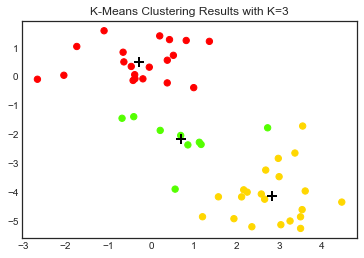

In [13]:
f, ax2 = plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Hierarchical Clustering

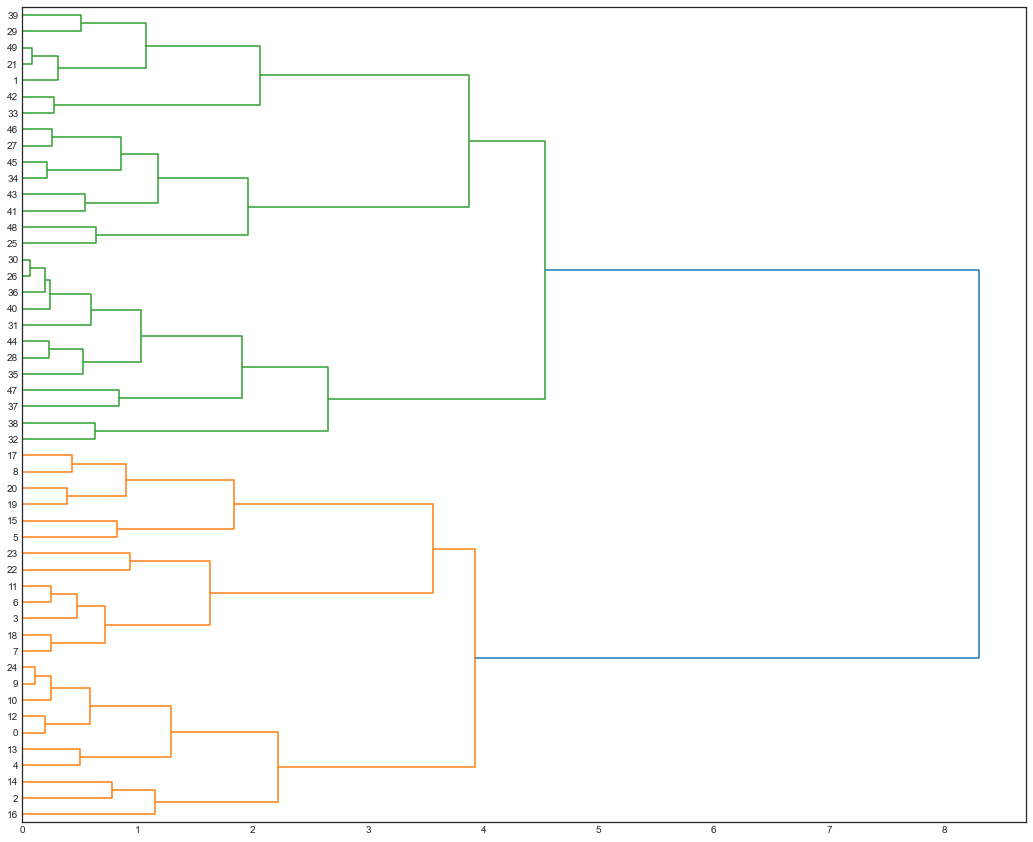

In [14]:
linkage=hierarchy.complete(X) #create hierarchical cluster using complete linkage
f,ax=plt.subplots(1,1,figsize=(18,15)) # prepare plot

cluster=hierarchy.dendrogram(linkage,orientation='right',leaf_font_size=10,ax=ax)

### Try
Plot the other type of linkage using on the random data X (used in the k-means)
    1. hierarchy.average(X) 
    1. hierarchy.single(X)
    

### Density Clustering DBSCAN


In [15]:
db = DBSCAN(eps=1.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create array same size as db.labels_ with zeros
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(db.core_sample_indices_)
print(labels)
# Number of clusters in labels, ignoring noise if present. -1 is noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

[ 0  4  6  7  8  9 10 11 12 13 14 18 19 20 23 24 26 27 28 30 31 34 35 36
 40 44 45 46 48]
[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1 -1]
Estimated number of clusters: 2


In [16]:
#From Sci-kit Learn 
#Plot samples and clusters
def plot_dbscan (X,labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
        # White used for noise.
            col = [0, 1,1,1]
    
        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

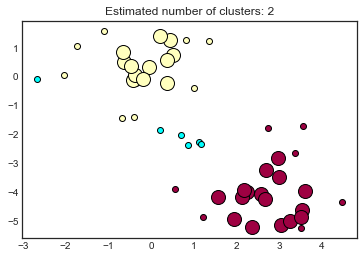

In [17]:
plot_dbscan(X, labels, core_samples_mask)

### Noisy Circle dataset

In [18]:
from sklearn import datasets
n_samples = 1500
X1,y1= datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
X1 = StandardScaler().fit_transform(X1)

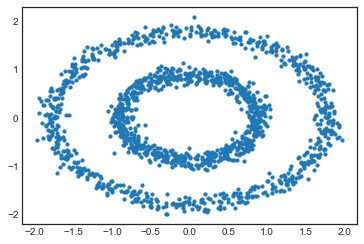

In [19]:
plt.scatter(X1[:, 0], X1[:, 1], s=10)

### Question
Cluster the noisy circle data (above) with these clustering algorithm:
1. K-Means (select the best K) 
1. DBSCAN(select best eps) 

Comment on the capabilities of each clustering algorithm 

In [26]:
#K-Means
from sklearn.metrics import silhouette_score

# 產生的資料組數 (20)
clusters = 20

# K 值的範圍 (2~20)
k_range = range(2, clusters)

distortions = []
scores = []

# 記錄每種 K 值建出的 KMeans 模型的成效
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(X1)
    distortions.append(kmeans.inertia_) 

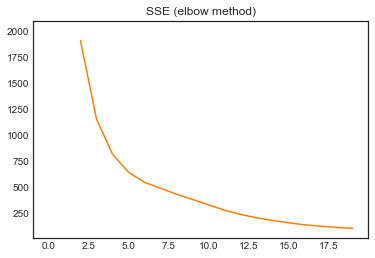

In [59]:
plt.plot(2000)
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)
#select k=3

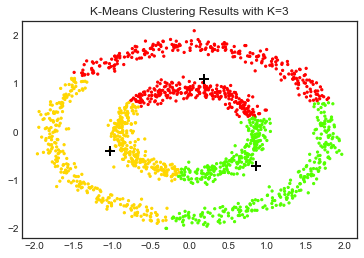

In [64]:
#The clustering effect of k-means is not so good

km3 = KMeans(n_clusters=3, n_init=100) # run k means
km3.fit(X1)

f, ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], s=5, c=km3.labels_, cmap=plt.cm.prism) 
ax.set_title('K-Means Clustering Results with K=3')
ax.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

[   0    1    2 ... 1497 1498 1499]
[0 0 1 ... 1 1 0]
Estimated number of clusters: 2


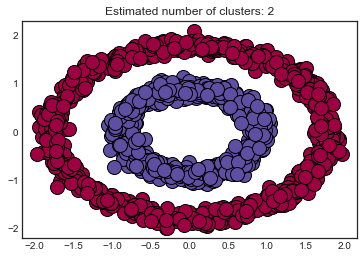

In [53]:
#DBSCAN
#this algorithm will determine the final number of clusters based on the nature of the data.
#so it doesn't need to determine the number of clusters like k-means.
#The clustering effect of DBSCAN is better than K-means.

#select eps=0.2
db = DBSCAN(eps=0.2, min_samples=2).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create array same size as db.labels_ with zeros
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(db.core_sample_indices_)
print(labels)
# Number of clusters in labels, ignoring noise if present. -1 is noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
plot_dbscan(X1, labels, core_samples_mask)